In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Real_Combine_1.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,0.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,0.0,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,0.0,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,0.0,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,0.0,46.0,6.9,3.3,5.4,223.208333


In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [7]:
dtree.score(X_train,y_train)#R^2 training score

0.9957259509130751

In [8]:
dtree.score(X_test,y_test)#R^2 test score

-0.07651987619575529

#### It has performed very good on train data BUT very poorly on test data which says that the data is OVERFITTED

In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,X,y,cv=5)
score

array([-0.18761535, -0.56627911, -0.0646461 , -0.16174913, -0.49812497])

In [10]:
score.mean() #R^2 score on the complete dataset

-0.2956829325057494

# Visvualizing a decision tree (not that imp. here)

In [11]:
from IPython.display import Image
from sklearn.externals.six import StringIO#need to downgrade to sklearn version 0.22. For now I am not doing
from sklearn.tree import export_graphviz
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [12]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [19]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [13]:
dot_data = StringIO() #need to downgrade to sklearn version 0.22 for using StringIO 
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'StringIO' is not defined

#### The graph looks something like this (just for demo purpose)
If you want to see the complete graph based on this dataset, open the file: "decision tree graph.png" and ZOOM-IN
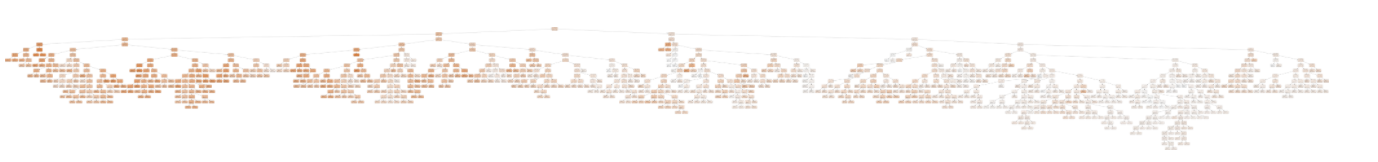

#### Model evaluation

In [14]:
prediction = dtree.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

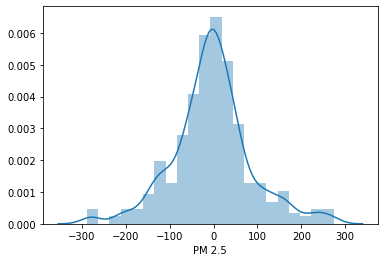

In [16]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [17]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [18]:
from sklearn.model_selection import GridSearchCV
random_search = GridSearchCV(dtree,params,scoring = 'neg_mean_squared_error',n_jobs=-1,cv=10,verbose = 3)

In [19]:
random_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 31248 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 39952 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 60432 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 72208 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 85008 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 102400

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [20]:
random_search.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [21]:
random_search.best_score_

-4305.15725122477

In [22]:
# Now prediction after hyperparameter tuning
prediction = random_search.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

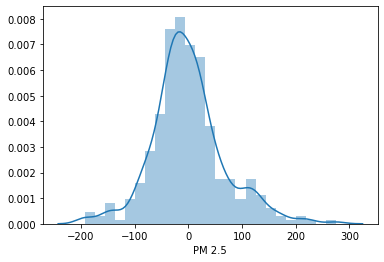

In [23]:
sns.distplot(y_test-prediction)

In [26]:
from sklearn import metrics
import numpy as np
print(metrics.mean_absolute_error(y_test,prediction))
print(metrics.mean_squared_error(y_test,prediction))
print(np.sqrt(metrics.mean_squared_error(y_test,prediction)))

49.96557538970893
4634.088499756496
68.07413972836157


In [27]:
import pickle
file = open('Decision_regression_model.pkl','wb')
pickle.dump(random_search,file)